In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV파일 로드

In [3]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 결측치 확인

In [4]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 이상치 확인

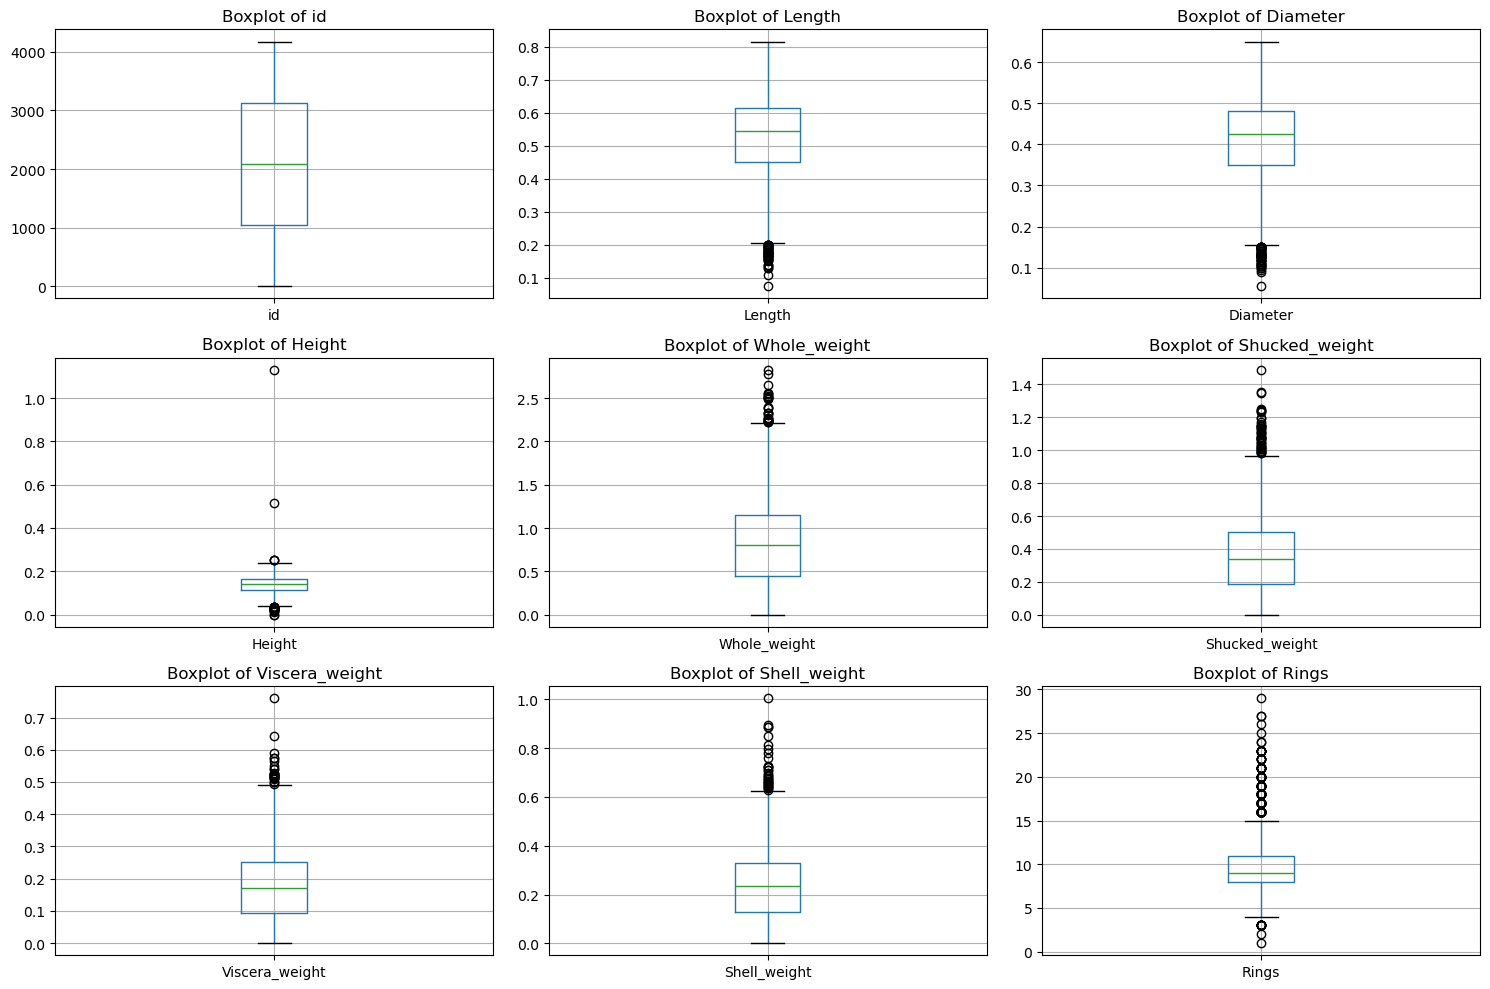

In [5]:
# 수치형 데이터 열만 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 그리기 위한 설정
plt.figure(figsize=(15, 10))

# 각 변수에 대해 개별 박스플롯을 그립니다.
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid로 subplot을 설정
    df.boxplot(column)
    plt.title(f'Boxplot of {column}')

# 레이아웃을 자동으로 조정하여 겹치지 않게 함
plt.tight_layout()

# 플롯을 출력
plt.show()

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [6]:
df.info

<bound method DataFrame.info of         id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500 

In [7]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [8]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

(M->0, F->2, I->1)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_56576/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


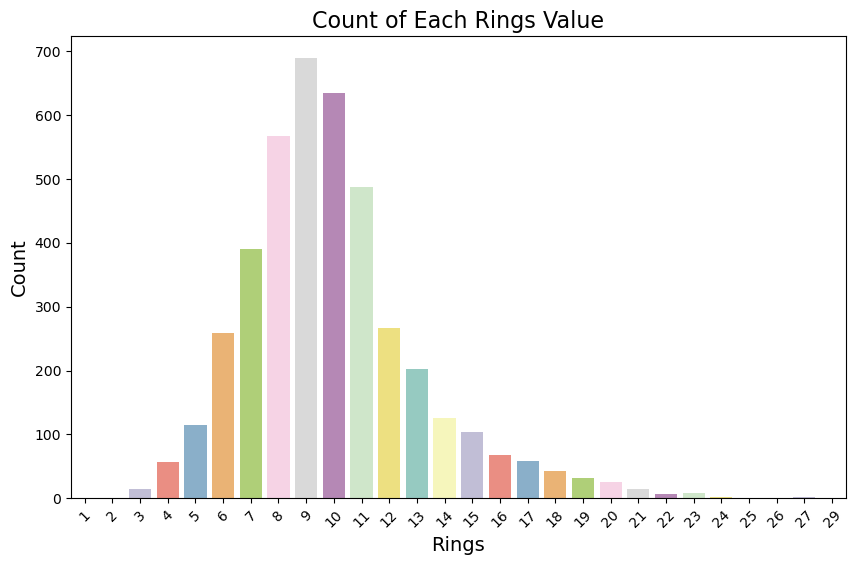

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

## 각 피쳐간의 상관관계를 확인.

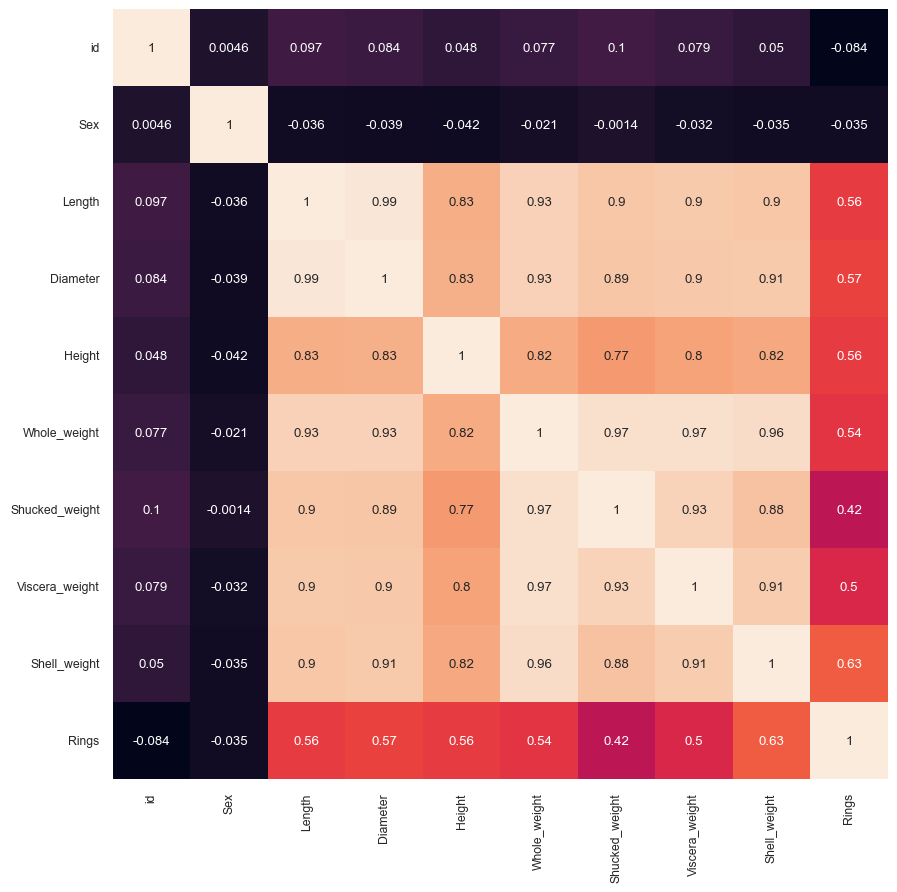

In [10]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
y = df["Rings"]
y 

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

## label값을 구간화
- 연속데이터를 범주형으로 바꾸는 작업

In [12]:
print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거

for ix in df.index :
    row = df.loc[ix]
    if row.Rings <= 8:
        df.loc[ix, 'Rings'] = 'young'
    elif row.Rings >= 11:
        df.loc[ix, 'Rings'] = 'old'
    elif row.Rings >=9 & row.Rings <= 10:
        df.loc[ix, 'Rings'] = 'medium'
        
df.head()

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_56576/3874682361.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ix, 'Rings'] = 'old'


,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,old
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,young
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,medium
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,medium
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,young


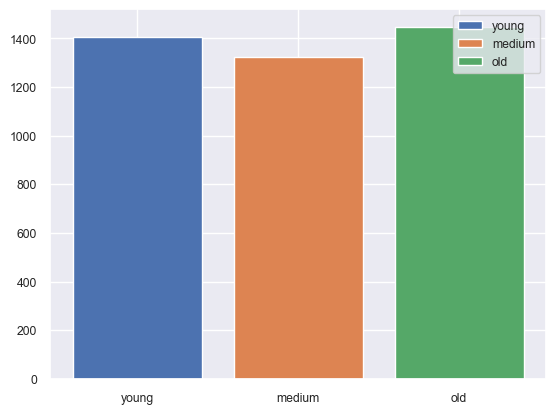

In [13]:
plt.bar("young", len(df[df['Rings'] == 'young']), label="young")
plt.bar("medium", len(df[df['Rings'] == 'medium']), label="medium")
plt.bar("old", len(df[df['Rings'] == 'old']), label="old")
plt.legend()
plt.show()

In [14]:
y = df['Rings']
y

0          old
1        young
2       medium
3       medium
4        young
         ...  
4172       old
4173    medium
4174    medium
4175    medium
4176       old
Name: Rings, Length: 4177, dtype: object

In [15]:
x = df.drop("Rings" , axis = 1)
x

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [16]:
print(x.shape)
print(y.shape)

(4177, 8)
(4177,)


In [17]:
import numpy as np

np.unique(y)


array(['medium', 'old', 'young'], dtype=object)

In [18]:
y.shape

(4177,)

## split_sequence
- 각 타임스텝에서 가장 빈번하게 나온 label을 해당 타임스텝의 label로 설정.

In [19]:
import numpy as np
from collections import Counter

# split_sequence 함수 
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [20]:
# n_step 값 정의
n_step = 7

# X과 y을 시퀀스 형태로 변환
X, y = split_sequence(x,y,n_step)
print(f" data shape: {X.shape}, Labels shape: {y.shape}")


 data shape: (4170, 7, 8), Labels shape: (4170,)


In [21]:
print(y)

['young' 'young' 'medium' ... 'medium' 'medium' 'medium']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2668, 7, 8), (834, 7, 8), (2668,), (834,), (668, 7, 8), (668,))

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

In [25]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
# Model 3
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add((Dropout(0.5)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add((Dropout(0.5)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add((Dropout(0.5)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2024-09-30 17:53:57.520143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-30 17:53:57.520362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             800       
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             6208      
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 32)             6176      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 flatten (Flatten)    

In [27]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50


2024-09-30 17:53:57.890650: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-30 17:53:58.240320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 51.1240 - accuracy: 0.3253

2024-09-30 17:54:06.504498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 9s 25ms/step - loss: 51.1240 - accuracy: 0.3253 - val_loss: 27.1531 - val_accuracy: 0.3039
Epoch 2/50
167/167 [==============================] - 2s 13ms/step - loss: 10.1829 - accuracy: 0.3403 - val_loss: 13.8504 - val_accuracy: 0.3069
Epoch 3/50
167/167 [==============================] - 2s 12ms/step - loss: 6.4884 - accuracy: 0.3534 - val_loss: 9.1221 - val_accuracy: 0.3054
Epoch 4/50
167/167 [==============================] - 2s 12ms/step - loss: 4.8975 - accuracy: 0.3403 - val_loss: 6.2284 - val_accuracy: 0.3054
Epoch 5/50
167/167 [==============================] - 2s 13ms/step - loss: 3.6204 - accuracy: 0.3516 - val_loss: 4.6805 - val_accuracy: 0.3144
Epoch 6/50
167/167 [==============================] - 2s 12ms/step - loss: 2.6779 - accuracy: 0.3534 - val_loss: 3.7911 - val_accuracy: 0.3099
Epoch 7/50
167/167 [==============================] - 2s 13ms/step - loss: 2.3637 - accuracy: 0.3602 - val_loss: 3.7407 - val_accuracy: 0.3069
Epoch 

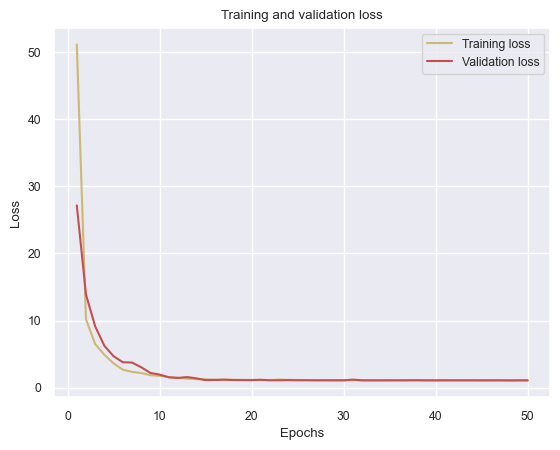

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

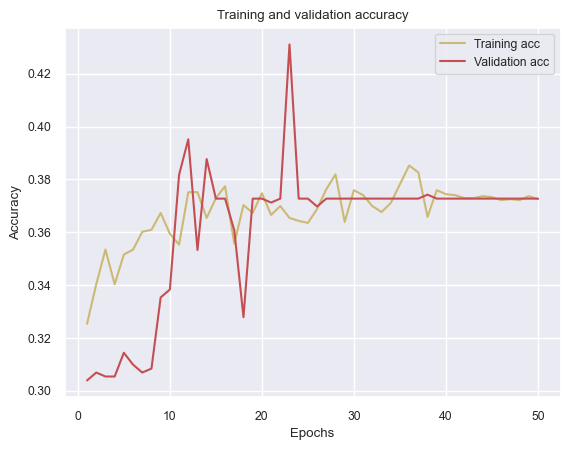

In [29]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

24/27 [=========================>....] - ETA: 0s

2024-09-30 17:55:50.549616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 27ms/step
[[  0 253   0]
 [  0 311   0]
 [  0 270   0]]
0.37290167865707435
0.2025719162661138
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.37      1.00      0.54       311
           2       0.00      0.00      0.00       270

    accuracy                           0.37       834
   macro avg       0.12      0.33      0.18       834
weighted avg       0.14      0.37      0.20       834



/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

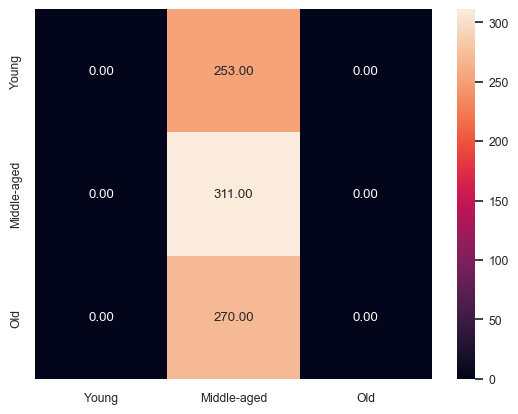

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score, classification_report
predy=model.predict(X_test)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')